In [1]:
import os

# Change the working directory
os.chdir('d:\\10Academy\\Week0')

# Verify the current working directory
print(os.getcwd())

d:\10Academy\Week0


In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import sys


In [22]:
from scripts.summaryStat import statsticsSummary,timeSerieAnalysis,cleaningEffect
from scripts.handlingAnomiles import *

In [4]:
dataPath="data/sierraleone-bumbuna.csv" 
df = pd.read_csv(dataPath)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# Dropping comments column since most of it's contnent is null which is almost all
df=df.drop("Comments", axis=1)

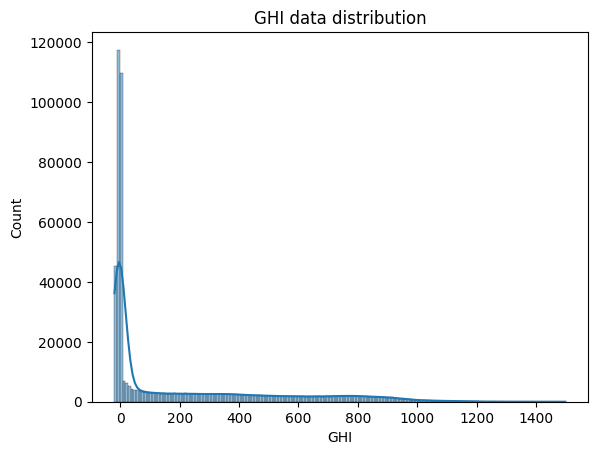

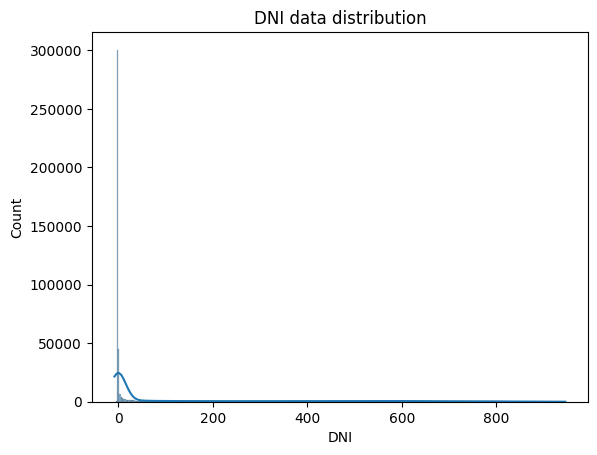

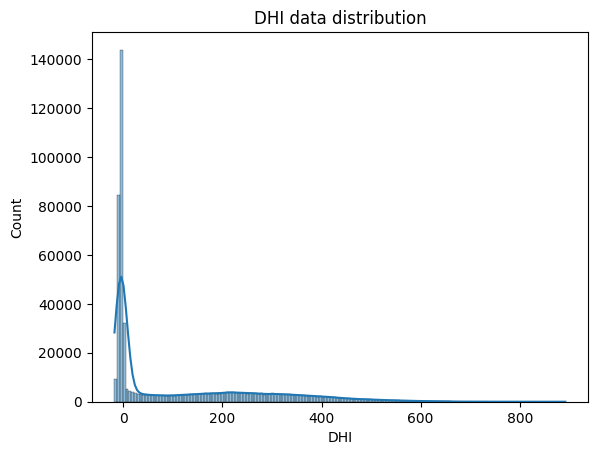

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


In [8]:
statsticsSummary(df, ["GHI","DNI","DHI"])

In [9]:
handledData=hadlingAnomali(df,["GHI","DNI","DHI"])
handledData

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
396,2021-10-30 06:37,0.2,-0.1,0.1,1.4,1.3,22.1,98.4,1.3,1.9,0.4,182.2,5.6,1002,0,0.0,22.3,22.7
397,2021-10-30 06:38,0.3,-0.1,0.2,1.5,1.4,22.1,98.6,1.6,1.9,0.4,177.6,7.1,1002,0,0.0,22.4,22.7
398,2021-10-30 06:39,0.4,-0.1,0.3,1.6,1.5,22.1,98.5,0.7,1.6,0.6,183.3,2.6,1002,0,0.0,22.4,22.7
399,2021-10-30 06:40,0.5,-0.1,0.5,1.8,1.6,22.1,98.7,0.1,0.7,0.2,189.5,1.0,1002,0,0.0,22.4,22.7
400,2021-10-30 06:41,0.7,-0.1,0.7,1.9,1.8,22.1,98.7,1.0,1.6,0.6,172.4,6.1,1002,0,0.0,22.4,22.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525262,2022-10-29 18:23,1.6,-0.2,-0.2,3.6,3.4,27.9,93.4,0.0,0.0,0.0,0.0,0.0,997,0,0.0,27.7,27.9
525263,2022-10-29 18:24,1.2,-0.3,-0.5,3.2,3.0,27.9,93.4,0.0,0.0,0.0,0.0,0.0,997,0,0.0,27.6,27.9
525264,2022-10-29 18:25,0.8,-0.3,-0.8,2.9,2.7,27.9,93.6,0.0,0.0,0.0,0.0,0.0,997,0,0.0,27.5,27.8
525265,2022-10-29 18:26,0.5,-0.3,-1.1,2.6,2.5,27.9,94.2,0.0,0.0,0.0,0.0,0.0,997,0,0.0,27.5,27.7


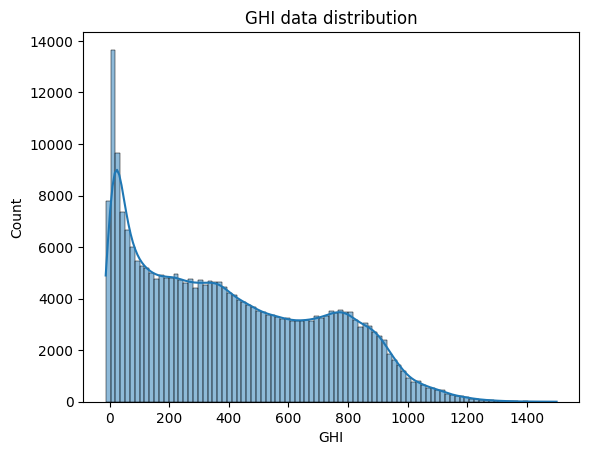

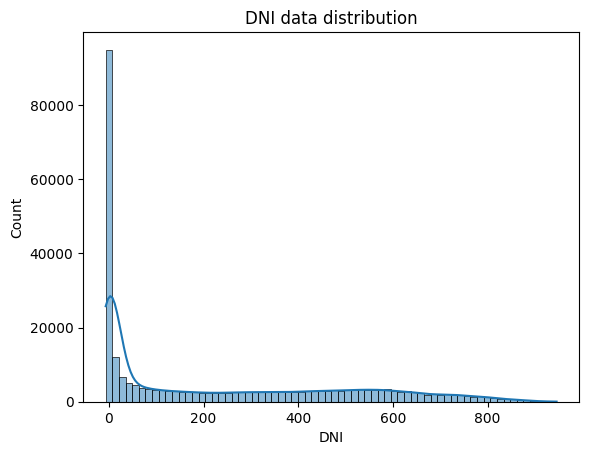

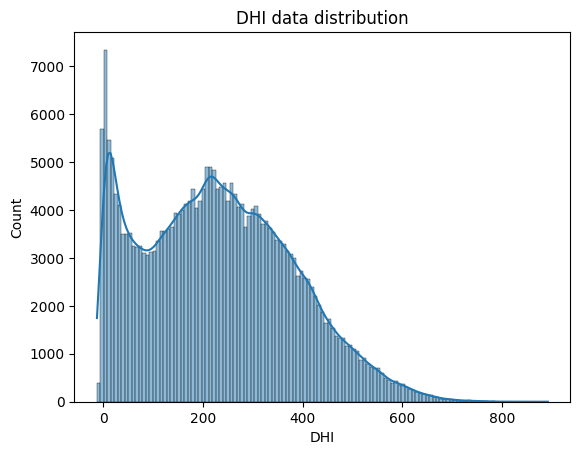

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000,265208.000000
mean,405.085129,230.901320,230.411163,409.424044,392.531112,28.756628,70.606163,1.554860,2.273930,0.467677,173.211156,10.392871,999.487753,0.001908,0.003242,41.153135,41.015508
std,305.414196,261.295435,150.225932,310.535796,298.501704,4.296141,22.208776,1.260477,1.587067,0.273756,106.724679,7.985095,2.320362,0.043638,0.041637,12.092067,11.556539
min,-12.800000,-6.800000,-12.400000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,11.000000,11.400000
25%,131.000000,1.000000,109.400000,129.700000,123.900000,25.300000,55.900000,0.400000,1.100000,0.400000,66.500000,4.400000,998.000000,0.000000,0.000000,30.900000,30.900000
50%,358.200000,101.900000,222.900000,355.200000,341.400000,28.900000,75.000000,1.500000,2.400000,0.500000,210.700000,10.300000,1000.000000,0.000000,0.000000,40.700000,41.100000
75%,653.600000,453.900000,336.100000,665.700000,636.400000,32.000000,88.200000,2.400000,3.400000,0.600000,252.400000,14.900000,1001.000000,0.000000,0.000000,51.200000,50.900000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


In [10]:
statsticsSummary(handledData,["GHI","DNI","DHI"] )

In [12]:
zscoredData=zScoreBaseOutliers(df, ['ModA', 'ModB', 'WS', 'WSgust'])

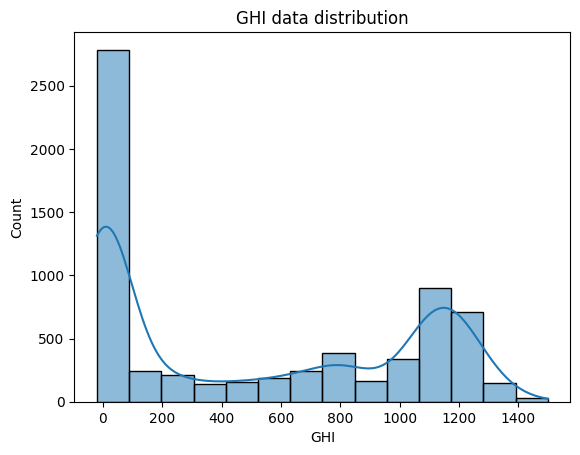

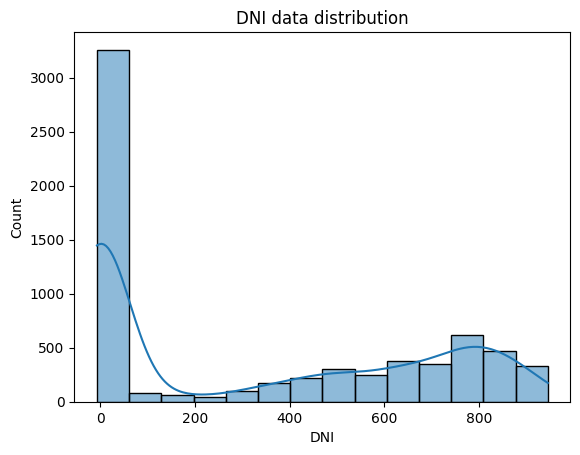

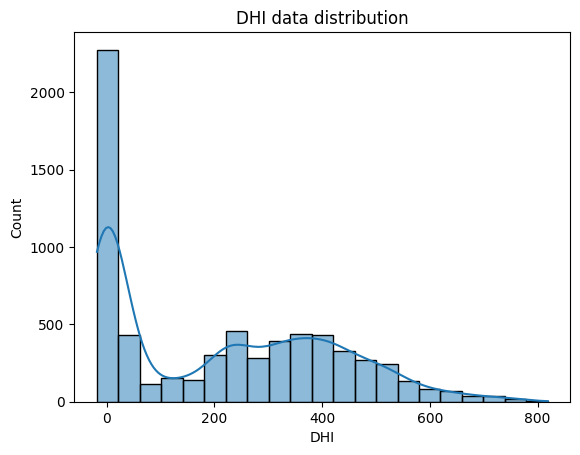

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.0,6630.000000,6630.000000,6630.000000
mean,514.264872,327.618235,211.901719,522.310769,506.682579,29.032609,68.392443,4.599759,6.300256,0.972760,174.173816,13.938763,999.521418,0.0,0.061448,41.524118,40.884751
std,510.539569,353.431186,203.887254,510.445199,497.544460,3.706037,22.445113,2.258324,2.980064,0.467482,89.780999,5.634053,2.192310,0.0,0.227690,14.561267,13.644241
min,-19.500000,-7.500000,-17.900000,0.000000,0.000000,20.600000,10.200000,0.000000,0.000000,0.000000,0.000000,0.000000,994.000000,0.0,0.000000,20.500000,20.800000
25%,-0.700000,-0.200000,-0.900000,0.700000,0.700000,26.200000,60.400000,2.800000,3.600000,0.600000,91.700000,10.500000,998.000000,0.0,0.000000,27.200000,27.400000
50%,373.350000,105.300000,211.700000,377.100000,360.800000,29.100000,74.800000,5.000000,6.700000,0.900000,205.700000,13.300000,1000.000000,0.0,0.000000,39.300000,39.100000
75%,1085.000000,697.000000,379.750000,1106.000000,1080.000000,31.200000,83.400000,5.700000,7.700000,1.200000,241.100000,16.500000,1001.000000,0.0,0.000000,55.400000,54.000000
max,1499.000000,946.000000,819.000000,1507.000000,1473.000000,39.400000,100.000000,19.200000,23.900000,4.100000,360.000000,98.100000,1006.000000,0.0,2.400000,72.500000,70.400000


In [13]:
statsticsSummary(zscoredData,["GHI","DNI","DHI"] )

- **Histograms** show the frequency distribution of each variable, helping to identify patterns such as normal distributions or skewness.
- **These visualizations** allow as to identify outliers, spread, and central tendencies for key variables.

In [14]:
# setting the timestamp as an index for easit time-base manipulation
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [15]:
# Checking correlation between solar radiation and environmental factors
df_correlation = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP','ModA', 'ModB']].corr()

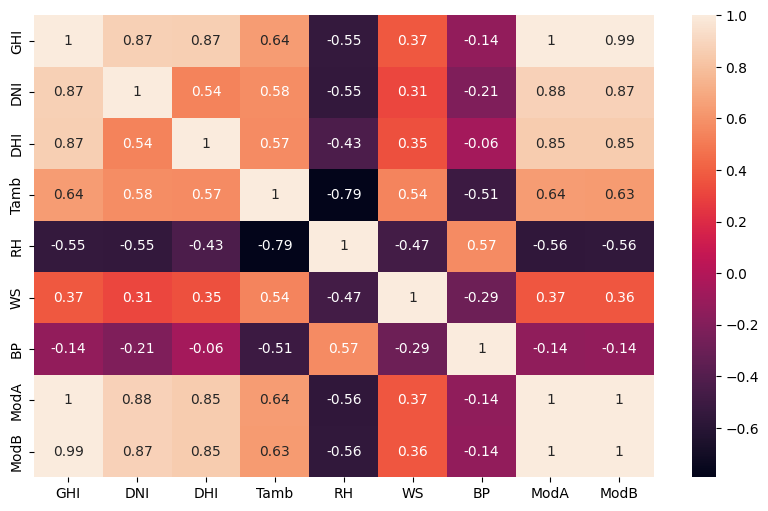

In [16]:
plt.figure(figsize=(10,6))
sb.heatmap(df_correlation,annot=True)
plt.show()

- **Heatmap:** A heatmap of the correlation matrix will help visualize relationships between variables. Correlations between environmental factors (like temperature and humidity), Irradiance measurements from sensors A and B and solar radiation can reveal important dependencies.

- **+1 to -1:** The correlation coefficient indicates the strength and direction of the linear relationship.
    - **+1:** Strong positive relationship.
    - **0:**  No relationship.
    - **-1:** Strong negative relationship.
    
The magnitude of the correlation coefficient indicates how closely the data points follow a linear relationship, while the sign indicates whether the relationship is positive or negative.

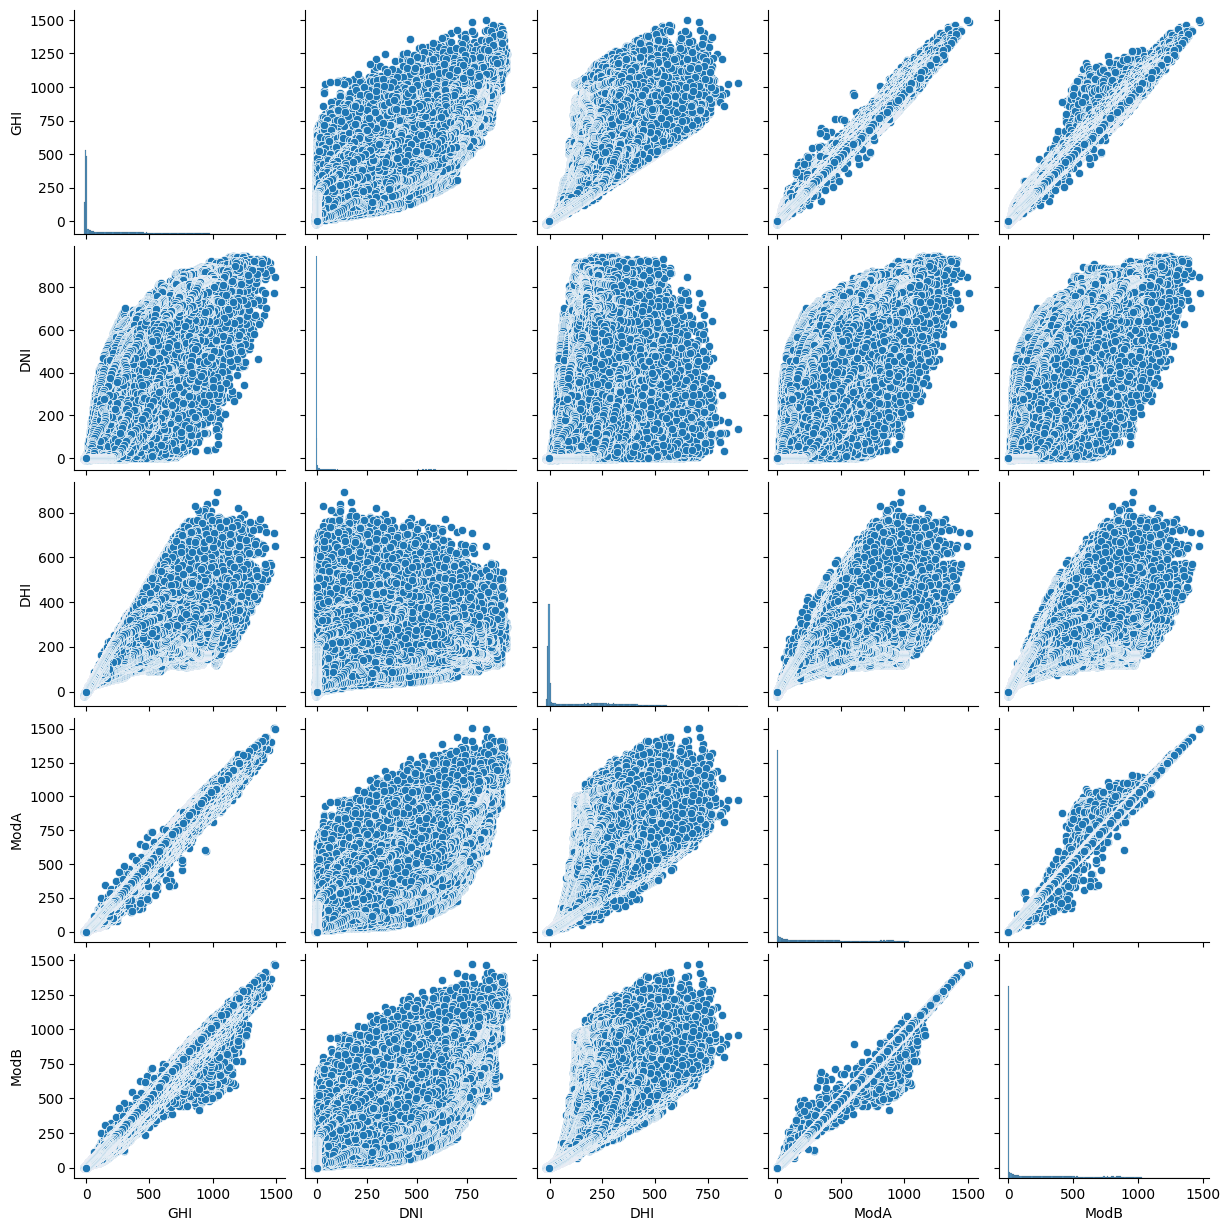

In [17]:
scatterPairPlot=df [["GHI", "DNI", "DHI","ModA", "ModB"]]

sb.pairplot(scatterPairPlot)

- ***Pairwise Scatterplots:***

- **Relationships:** Each scatterplot shows how two variables relate to each other (e.g., GHI vs. DNI, DHI vs. ModA, etc.). This helps detect patterns, correlations, or clustering between variables.
- **Trends:** It helps in  identify positive or negative trends between variables. 

### **Time Series Analysis:**

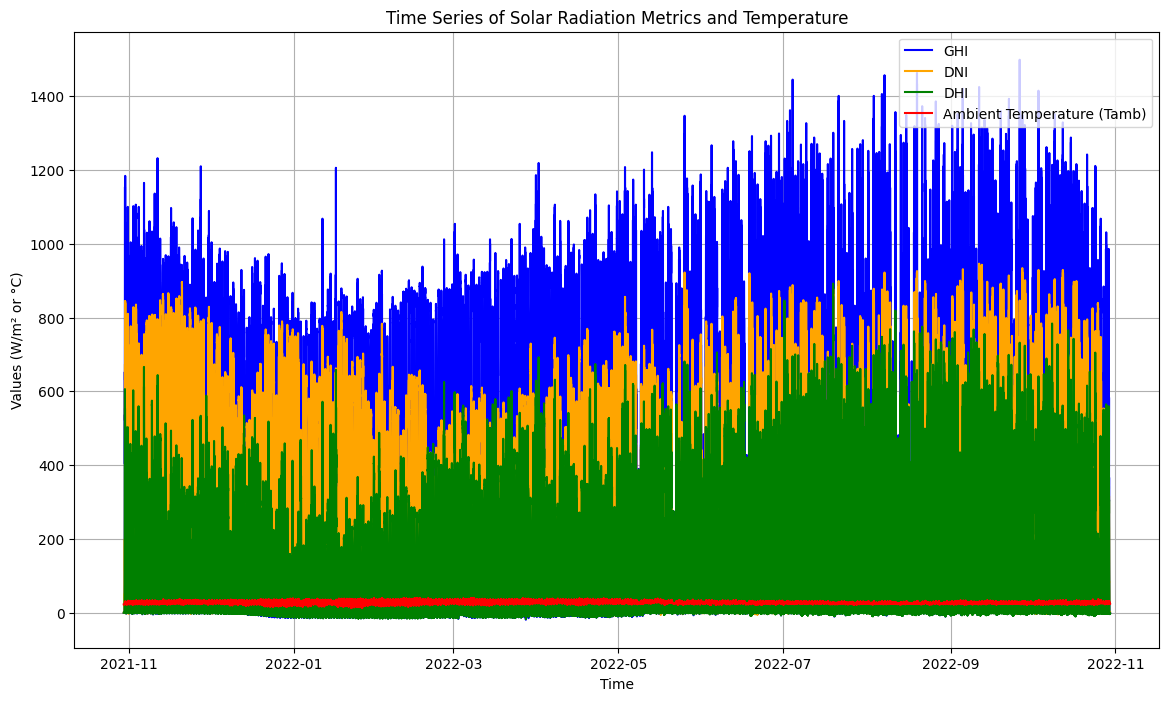

In [18]:
timeSerieAnalysis(df)

### Time Series Resampling Overview

Time series resampling is a key technique for aggregating and analyzing data over different intervals, helping to uncover broader trends that might be missed in granular data.

- **Daily Resampling**: Identifies day-to-day variations and outliers.
- **Monthly Resampling**: Reveals long-term seasonal patterns, vital for strategic solar investments.

By utilizing resampling, MoonLight Energy Solutions can better understand solar radiation trends, aiding in the identification of high-potential season for solar installation and supporting sustainability goals.


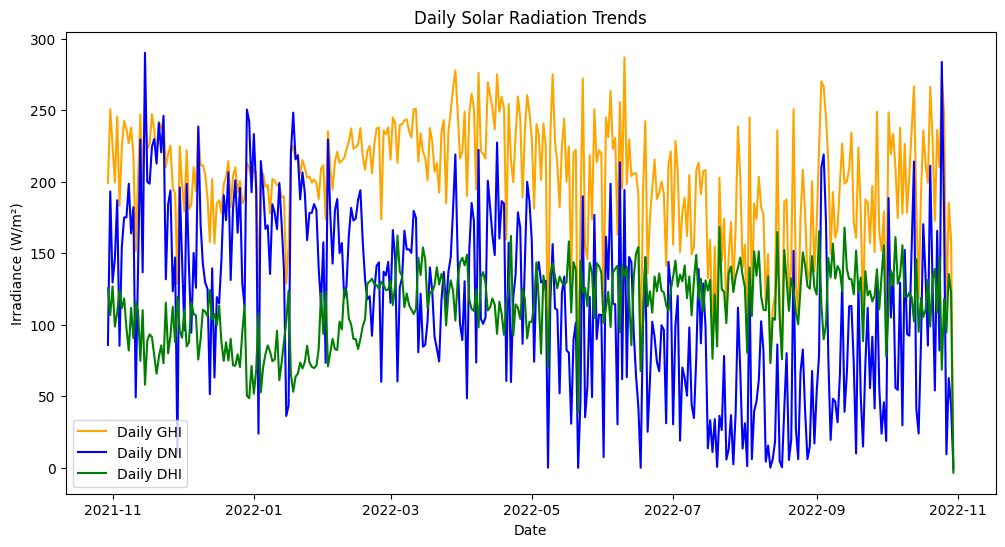

In [19]:
daiylAnalysis(df)

d:\10Academy\Week0\scripts\handlingAnomiles.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()  # 'M' stands for monthly resampling


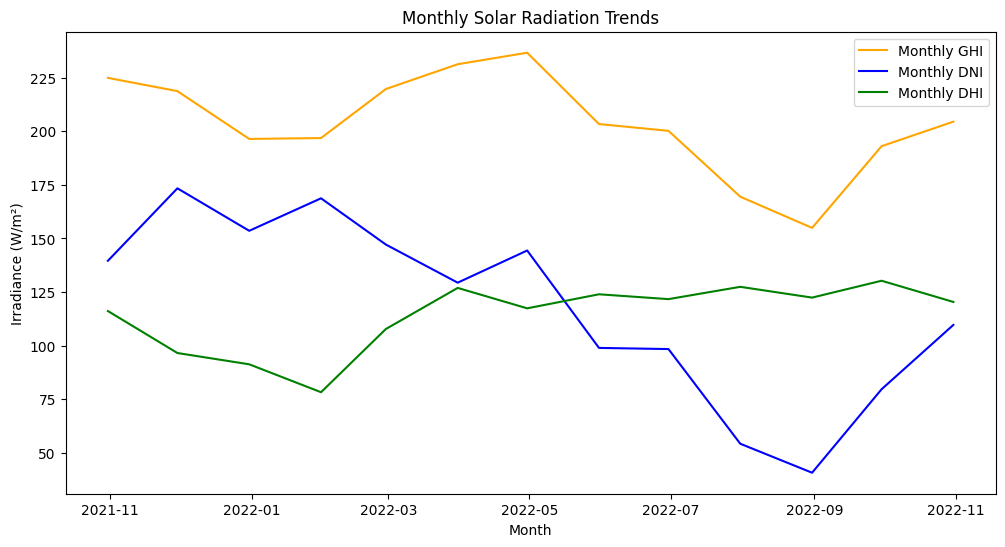

In [20]:
monthlyAnalysis(df)

d:\10Academy\Week0\week_0projects\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


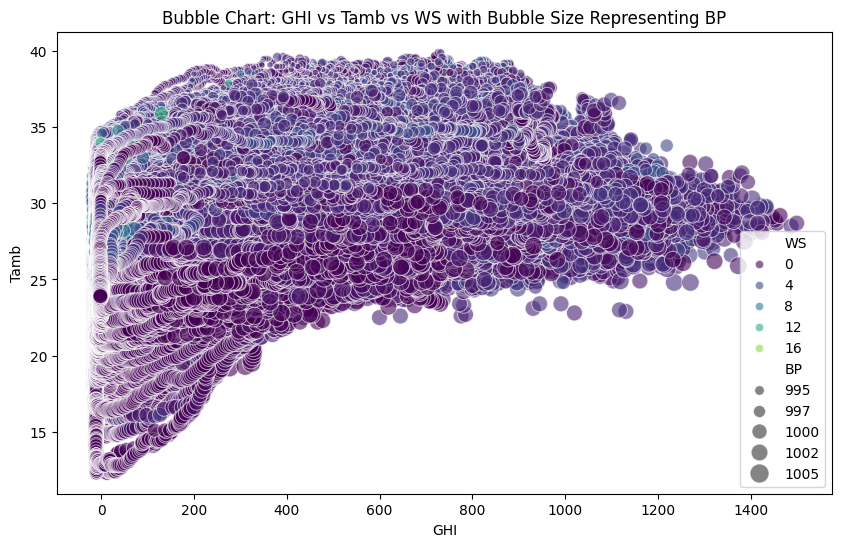

In [23]:
bubbleChart(df)